In [1]:
import matplotlib.pyplot as pl
import numpy as np
from matplotlib.patches import Polygon
from sympy.solvers import solve

In [2]:
#### Kinematics
Q = 91
qT = 10
y = 1
M = np.sqrt(Q**2+qT**2)

etamax = 2.4
pTmin = 20

In [3]:
# Define generalised theta function
def GenTheta(eta, x):
    pTo = Q**2 / 2 / ( M * np.cosh(eta - y) - qT * x)
    etao = np.log( ( M * np.exp(y) - pTo * np.exp(eta) ) / ( M * np.exp(-y) - pTo * np.exp(-eta) ) ) / 2
    hs1 = np.heaviside(pTo - pTmin, 1.)
    hs2 = np.heaviside(eta + etamax, 1.) * np.heaviside(etamax - eta, 1.)
    hs3 = np.heaviside( np.sqrt(qT**2 + pTo**2 - 2 * qT * pTo * x) - pTmin, 1. )
    hs4 = np.heaviside(etao + etamax, 1.) * np.heaviside(etamax - etao, 1.)
    return hs1 * hs2 * hs3 * hs4

$$x^{p_{T,\rm min}}(\eta)= \frac{2 p_{T,\rm min} M \cosh(\eta-y)- Q^2}{2 |\mathbf{q}_T|p_{T,\rm min}}$$

In [4]:
# Solution obtained with SymPy (Solutions.ipynb)
def xpTmin(eta):
    #return (-Q**2 + pTmin*np.sqrt(Q**2 + qT**2)*(np.exp(-2*eta + 2*y) + 1)*np.exp(eta - y))/(2*pTmin*qT)
    return ( 2 * M * pTmin * np.cosh(eta-y) - Q**2 ) / ( 2 * pTmin * qT )

$$x^{\eta_{\rm max}}(\eta)= $$

In [45]:
# Solution obtained with SymPy (Solutions.ipynb)
def xpTmin2(eta):
    return ( M * np.cosh(eta - y) * ( Q**2 - 2 * pTmin**2 + 2 * qT**2)  - Q**2 * np.sqrt( M**2 * np.sinh(eta - y)**2 + pTmin**2) ) / ( 2 * qT * ( M**2 - pTmin**2 ) )
    #return (-Q**2*np.sqrt((Q**2*np.exp(4*eta) + Q**2*np.exp(4*y) - 2*Q**2*np.exp(2*eta + 2*y)
    #                       + 4*pTmin**2*np.exp(2*eta + 2*y) + qT**2*np.exp(4*eta) + qT**2*np.exp(4*y)
    #                       - 2*qT**2*np.exp(2*eta + 2*y))*np.exp(2*eta + 2*y))*np.exp(eta + y)
    #        + np.sqrt(Q**2 + qT**2)*(np.exp(2*eta) + np.exp(2*y))*(Q**2 - 2*pTmin**2 + 2*qT**2)
    #        *np.exp(2*eta + 2*y))*np.exp(-3*eta - 3*y)/(4*qT*(Q**2 - pTmin**2 + qT**2))

In [46]:
# Solution obtained with SymPy (Solutions.ipynb)
def xetamax(eta):
    return M * np.cosh(eta - y) / qT - Q**2 * np.sinh(eta - etamax) / ( 2 * qT * M * np.sinh(y - etamax) )
    #return (Q**2*np.exp(2*eta)*np.sqrt(np.exp(2*eta + 6*y)) - Q**2*np.exp(2*etamax)*np.sqrt(np.exp(2*eta + 6*y))
    #        - 2*Q**2*np.exp(eta + 5*y) - Q**2*np.exp(3*eta + 3*y) + Q**2*np.exp(eta + 2*etamax + 3*y)
    #        + 2*Q**2*np.exp(3*eta + 2*etamax + y) - 2*qT**2*np.exp(eta + 5*y) - 2*qT**2*np.exp(3*eta + 3*y)
    #        + 2*qT**2*np.exp(eta + 2*etamax + 3*y) + 2*qT**2*np.exp(3*eta + 2*etamax + y))*np.exp(-2*eta - 2*y)/(4*qT*np.sqrt(Q**2 + qT**2)*(np.exp(2*etamax) - np.exp(2*y)))

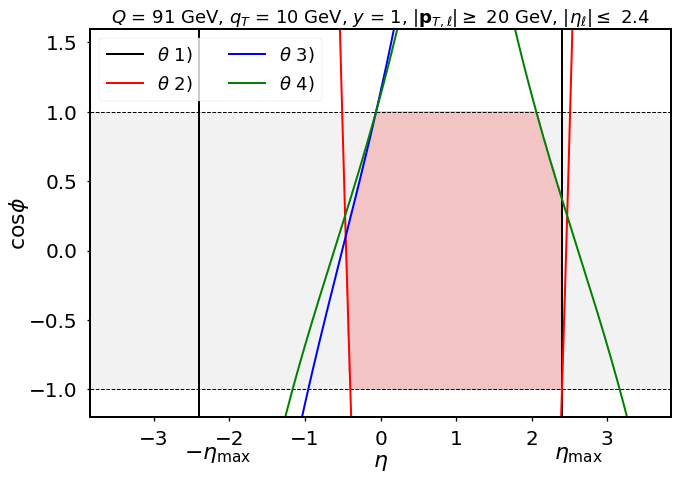

In [47]:
## Define plot parameters
pl.style.use('seaborn-talk')
pl.rc('axes', linewidth=2)
ax = pl.gca()

# Adjust canvas
pl.xlim(-1.6 * etamax, 1.6 * etamax)
pl.ylim(-1.2, 1.6)
pl.xticks(size=20)
pl.yticks(size=20)

# Axis labels
pl.xlabel(r'$\eta$', fontsize=22)
pl.ylabel(r'$\cos\phi$', fontsize=22, labelpad=-2)

# Title
pl.title(r"$Q$ = " + str(Q) + " GeV, $q_T$ = " + str(qT) + " GeV, $y$ = " + str(y)
         + ", $|\mathbf{p}_{T,\ell}|\geq$ " + str(pTmin) + " GeV, $|\eta_\ell|\leq$ " + str(etamax),
         fontsize = 18)

# Labels on plot
ax.text(-etamax-0.2, -1.5,  r'$-\eta_{\rm max}$', fontsize=22)
ax.text(etamax-0.1, -1.5,  r'$\eta_{\rm max}$', fontsize=22)

# Points in eta and x = cos\phi
n = 500
alleta = np.linspace(- 1.6 * etamax, 1.6 * etamax, num = n)
allx   = np.linspace(-1, 1, num = n)
E, X = np.meshgrid(alleta, allx)
T = GenTheta(E, X)

# Countour plot
pl.contourf(E, X, T, levels = [0.0001, 1.], colors = ["red", "blue"], alpha = 0.2)

# Shaded region            
verts = [(-10*etamax, -1)] + [(10*etamax, -1)] + [(10*etamax, 1)] + [(-10*etamax, 1)] 
poly = Polygon(verts, color = "gray", alpha = 0.1)
ax.add_patch(poly)

# Dashed lines
pl.axhline(y=-1, xmin=0, xmax=1, linewidth=1, color = 'k', linestyle='--')
pl.axhline(y=1, xmin=0, xmax=1, linewidth=1, color = 'k', linestyle='--')

# Theta 1
pl.axvline(x=-etamax, ymin=0, ymax=1, linewidth=2, color = 'k', linestyle='-', label=r"$\theta$ 1)")
pl.axvline(x=etamax, ymin=0, ymax=1, linewidth=2, color = 'k', linestyle='-')

# Theta 2
nx1 = xpTmin(alleta)
pl.plot(alleta, nx1, 'r', linewidth=2, label=r"$\theta$ 2)")

# Theta 3
nx2 = xetamax(alleta)
pl.plot(alleta, nx2, 'b', linewidth=2, label=r"$\theta$ 3)")

# Theta 4
nx3 = xpTmin2(alleta)
pl.plot(alleta, nx3, 'g', linewidth=2, label=r"$\theta$ 4)")

pl.legend(loc = 'upper left', ncol = 2, fontsize = 18)
pl.savefig("../plots/IntDomain.pdf")